# EDA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import itertools
import time
import gc

from pathlib import Path
import sys
ROOT = Path().resolve().parent
sys.path.append(str(ROOT))

from src.config import Config

In [ ]:
config = Config()

In [ ]:
#sales = pd.read_parquet(config.get('sales_for_eda'))

### Merging Dicts

In [ ]:


# Main dataset
sales = pd.read_parquet(config.get('cleaned_parquet'))

# Data-Dicts
items = pd.read_csv(config.get('items'))
items_categories = pd.read_csv(config.get('item_categories'))
shops = pd.read_csv(config.get('shops'))

In [3]:
items_categories['general_item_category_name'] = items_categories['item_category_name'].\
    apply(lambda x: 'Игровые консоли' if x.split()[0] == 'Игровые' else x.split()[0] )
shops['city'] = shops['shop_name'].apply(lambda x: 'Якутск' if x.split()[0] == '!Якутск' else x.split()[0] )
sales = sales.merge(items, on='item_id', how='left')
sales = sales.merge(items_categories, on = 'item_category_id', how = 'left')
sales = sales.merge(shops, on = 'shop_id', how = 'left')

In [4]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,was_item_price_outlier,was_item_cnt_day_outlier,item_name,item_category_id,item_category_name,general_item_category_name,shop_name,city
0,2013-01-01,0,2,991,99.0,1.0,0,0,"3D Action Puzzle ""Динозавры"" Тиранозавр",67,Подарки - Развитие,Подарки,"Адыгея ТЦ ""Мега""",Адыгея
1,2013-01-01,0,2,1472,2599.0,1.0,0,0,"Assassin's Creed 3 [Xbox 360, русская версия]",23,Игры - XBOX 360,Игры,"Адыгея ТЦ ""Мега""",Адыгея
2,2013-01-01,0,2,1905,249.0,1.0,0,0,"Bestseller. Grand Theft Auto: San Andreas [PC,...",30,Игры PC - Стандартные издания,Игры,"Адыгея ТЦ ""Мега""",Адыгея
3,2013-01-01,0,2,2920,599.0,2.0,0,0,Disney. LEGO Пираты Карибского моря (Essential...,21,Игры - PSP,Игры,"Адыгея ТЦ ""Мега""",Адыгея
4,2013-01-01,0,2,3320,1999.0,1.0,0,0,"FIFA 13 (с поддержкой PS Move) [PS3, русская в...",19,Игры - PS3,Игры,"Адыгея ТЦ ""Мега""",Адыгея
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928064,2015-10-31,33,59,20730,499.0,1.0,0,0,"Фигурка Scalers Wave 1 Alien 2""",72,Подарки - Фигурки,Подарки,"Ярославль ТЦ ""Альтаир""",Ярославль
2928065,2015-10-31,33,59,20866,699.0,1.0,0,0,Фигурка Tom Clancy's Splinter Cell Blacklist S...,72,Подарки - Фигурки,Подарки,"Ярославль ТЦ ""Альтаир""",Ярославль
2928066,2015-10-31,33,59,20949,5.0,1.0,0,0,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",Подарки,"Ярославль ТЦ ""Альтаир""",Ярославль
2928067,2015-10-31,33,59,21369,169.0,1.0,0,0,ХОББИТ: БИТВА ПЯТИ ВОИНСТВ (регион),40,Кино - DVD,Кино,"Ярославль ТЦ ""Альтаир""",Ярославль


## Price and items over all days

### How the mean of item prices was changing over the whole period (by days and monthes)? 

<Axes: title={'center': 'Mean price of items across all shops by days'}, xlabel='date'>

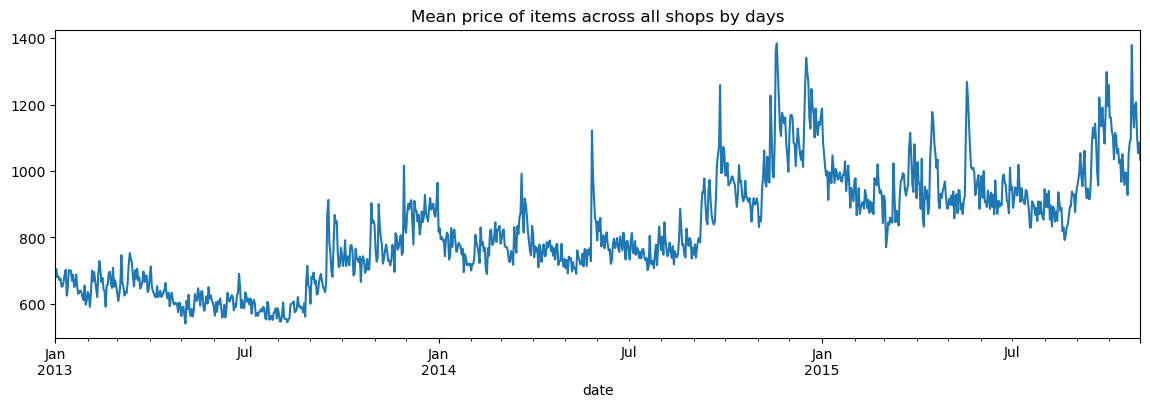

In [5]:
mean_item_prices_by_days = sales.groupby('date')['item_price'].mean()
mean_item_prices_by_days.plot(figsize=(14,4), title = 'Mean price of items across all shops by days')

<Axes: title={'center': 'Mean price of items across all shops by monthes'}, xlabel='date_block_num'>

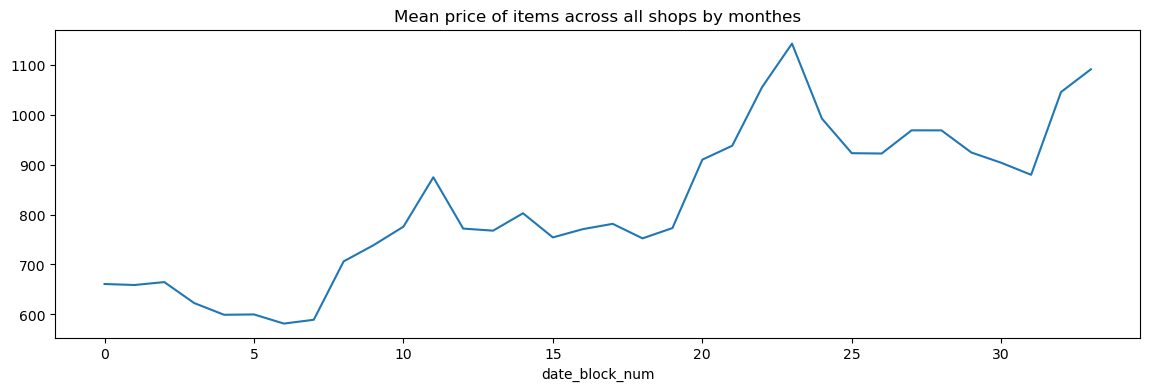

In [6]:
mean_item_prices_by_days = sales.groupby('date_block_num')['item_price'].mean()
mean_item_prices_by_days.plot(figsize=(14,4), title = 'Mean price of items across all shops by monthes')

As we can see from every October prices start to increase approximiatelly to + ~200 (money) mean price, and we get to the new level of mean prices after peaks in December. Also we get the most sold items in October and November compare to monthes before during the year.

### And how many items have been sold day by day over this period?

Not interactive plot:

<Axes: title={'center': 'Amount of sold items by days across all shops'}, xlabel='date'>

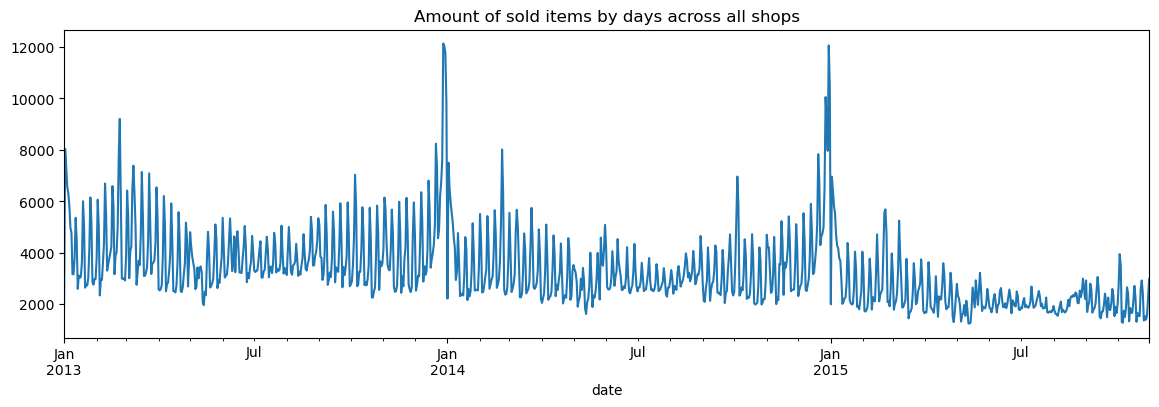

In [7]:
sales.groupby('date')['item_cnt_day'].sum().plot(figsize=(14, 4)\
                                              , title='Amount of sold items by days across all shops')

Interactive plot:

In [8]:
#daily_sales = sales.groupby('date')['item_cnt_day'].sum()
data = sales.groupby('date')['item_cnt_day'].sum().reset_index()
fig = px.line(
    data,
    x='date',
    y='item_cnt_day',
    title='Amount of sold items by days across all shops',
    labels={'date': 'Date', 'item_cnt_day': 'Total Sold Items'},
)
fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        dtick=7 * 24 * 60 * 60 * 1000,
        tickformat="%b %d\n%Y",  
        tickfont=dict(size=10),
        tickangle = 60
    )
)
fig.show()

We have the most items sold in December, and as it closer to 31th as more products have been sold daily. We can see some peaks of sold products during the month, but in our final prediction we predict overal sold items in November, and all our peaks are approximiatelly around the same mean which reflected on graph below since it isn't that dynamic as graph above.

<Axes: title={'center': 'Amount of sold items by monthes across all shops'}, xlabel='date_block_num'>

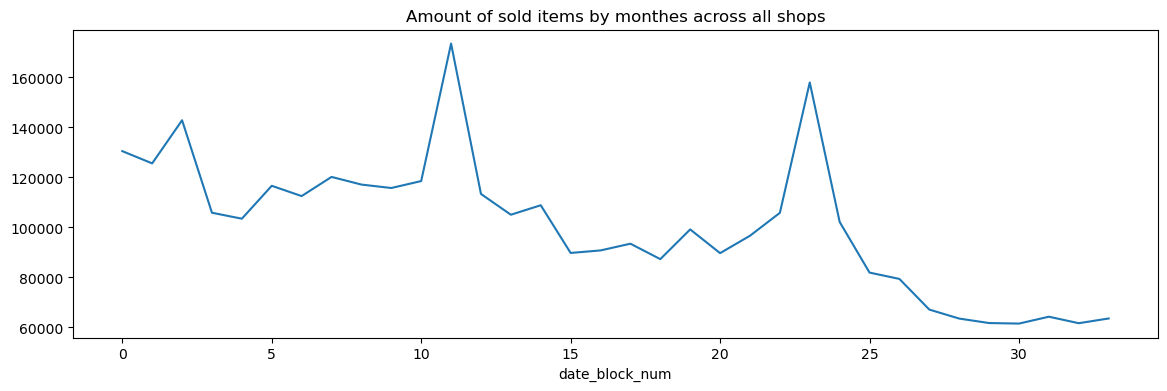

In [9]:
sales.groupby('date_block_num')['item_cnt_day'].sum().plot(figsize=(14, 4)\
                                                 , title='Amount of sold items by monthes across all shops')

The same plot but interactive:

In [10]:
data = sales.groupby('date_block_num')['item_cnt_day'].sum().reset_index()
fig = px.line(
    data,
    x='date_block_num',
    y='item_cnt_day',
    title='Amount of sold items by monthes across all shops',
    labels={'date_block_num': 'Month Number', 'item_cnt_day': 'Total Sold Items'},
).update_layout(xaxis=dict(tickmode='linear'))
fig.show()

In [11]:
#daily_sales

Seems we have negative correlation. As higher price, as lower amount of products which have been sold, we keep in mind it doens't necessary mean cause and effect relationship. Next we will take closer look at correlation between item_cnt_day and item_price

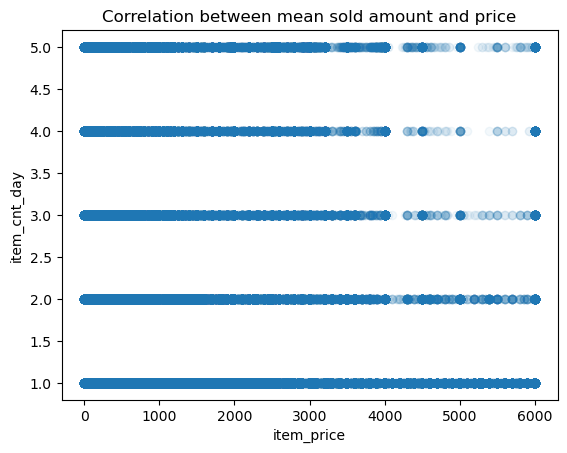

In [12]:
sales.groupby('date_block_num')['item_cnt_day'].mean()

correlation = sales['item_cnt_day'].corr(sales['item_price'])
plt.scatter(sales['item_price'], sales['item_cnt_day'], alpha=0.05)
plt.xlabel('item_price')
plt.ylabel('item_cnt_day')
plt.title('Correlation between mean sold amount and price')
plt.show()

Correlation: 0.05863176197170937


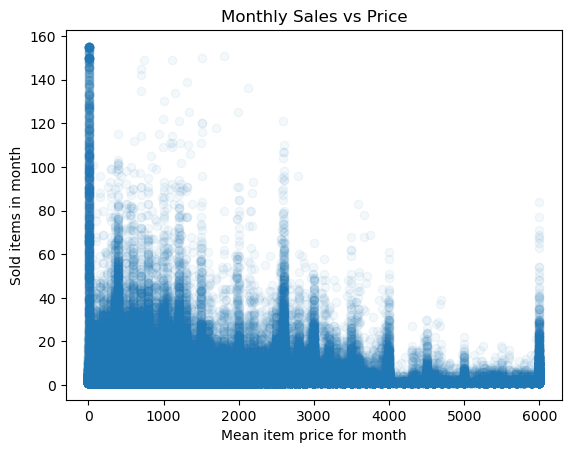

In [13]:
monthly_data = sales.groupby(['date_block_num', 'shop_id', 'item_id']).agg({
    'item_cnt_day': 'sum',
    'item_price': 'mean'
}).reset_index()

monthly_data.rename(columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)

correlation = monthly_data['item_cnt_month'].corr(monthly_data['item_price'])
print("Correlation:", correlation)

plt.scatter(monthly_data['item_price'], monthly_data['item_cnt_month'], alpha=0.05)
plt.xlabel('Mean item price for month')
plt.ylabel('Sold items in month')
plt.title('Monthly Sales vs Price')
plt.show()

Despite on the graph it seems we have some significant correlation, we have exact value which is ~0.058, what means there almost no linear correlation between item price and amount of total sold items by monthes.

C:\Users\Мариан\AppData\Local\Temp\ipykernel_22644\1000313446.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: title={'center': 'Amount of sold items for different price intervals'}, xlabel='price_bin'>

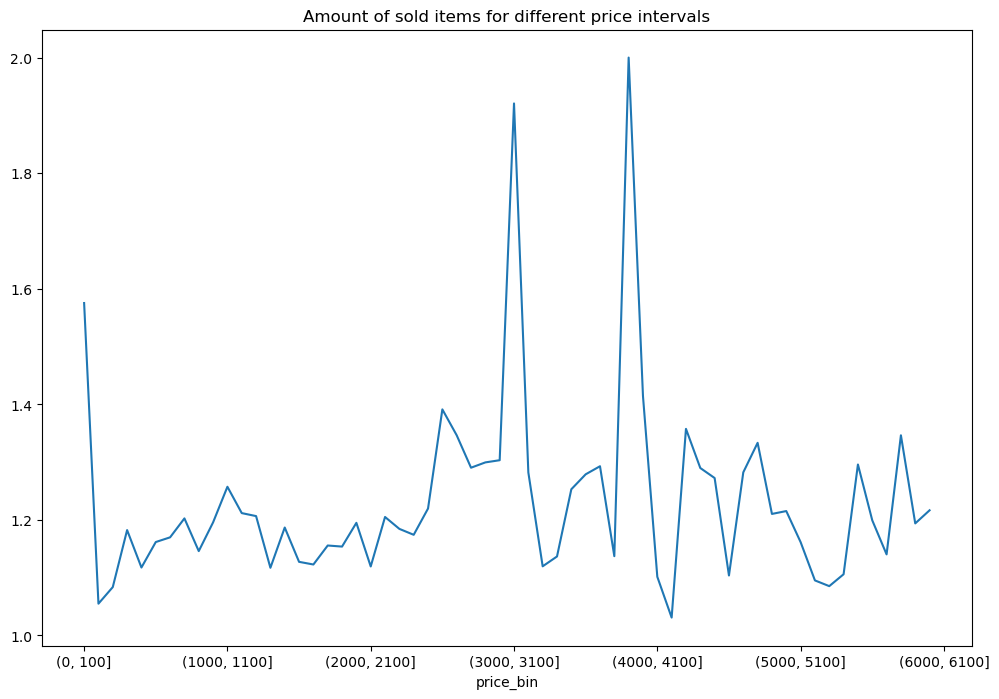

In [14]:
sales_correlation = sales.copy()
sales_correlation['price_bin'] = pd.cut(sales_correlation['item_price'], bins=np.arange(0, 10001, 100))
bin_stats = sales_correlation.groupby('price_bin')['item_cnt_day'].mean()
bin_stats.plot(figsize = (12,8), title='Amount of sold items for different price intervals')

In [15]:
from sklearn.feature_selection import mutual_info_regression

X = monthly_data[['item_price']]
y = monthly_data['item_cnt_month']

mi = mutual_info_regression(X, y)
print("Mutual information:", mi[0])

Mutual information: 0.10509572994774352


We have no quantative features to compare this value with, so we cannot make any conclusion about correlation based on mutual information

### ACF

To make lag features we should also check Autocorellation function :

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 1000x500 with 0 Axes>

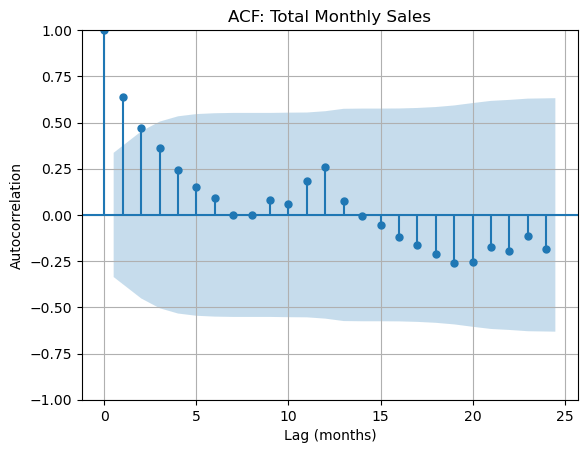

In [17]:
monthly_sales = sales.groupby('date_block_num')['item_cnt_day'].sum()
plt.figure(figsize=(10, 5))
plot_acf(monthly_sales, lags=24)
plt.title('ACF: Total Monthly Sales')
plt.xlabel('Lag (months)')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

🔭 We can see that sales in current month have statistically significant correlation with amount of sold items in last 1 and 2 monthes, and no significant resalt for 3-5 monthes. We defenetelly should add lag feature for amount of sold items for periods which show any seazonality (1-5 monthes). We also have annual peak correlation, which we observed earlier - sales in december are usually hight - we will also add lag feature with 12 months period. 

We'll add one more ACF with a daily period for clarity, even though it might not be useful for our model since we're predicting monthly sales.

<Figure size 1000x500 with 0 Axes>

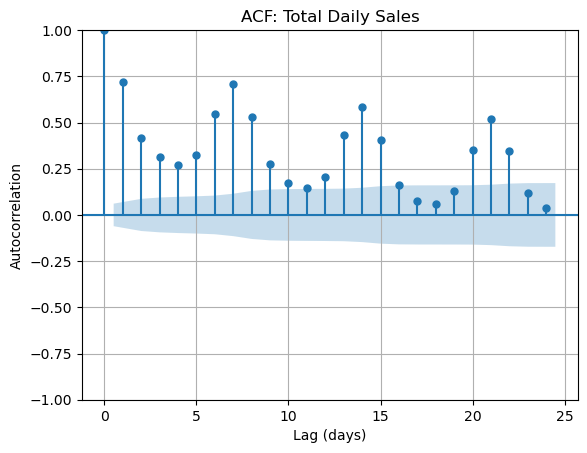

In [18]:
monthly_sales = sales.groupby('date')['item_cnt_day'].sum()
plt.figure(figsize=(10, 5))
plot_acf(monthly_sales, lags=24)
plt.title('ACF: Total Daily Sales')
plt.xlabel('Lag (days)')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

## Cities and products

<Axes: ylabel='city'>

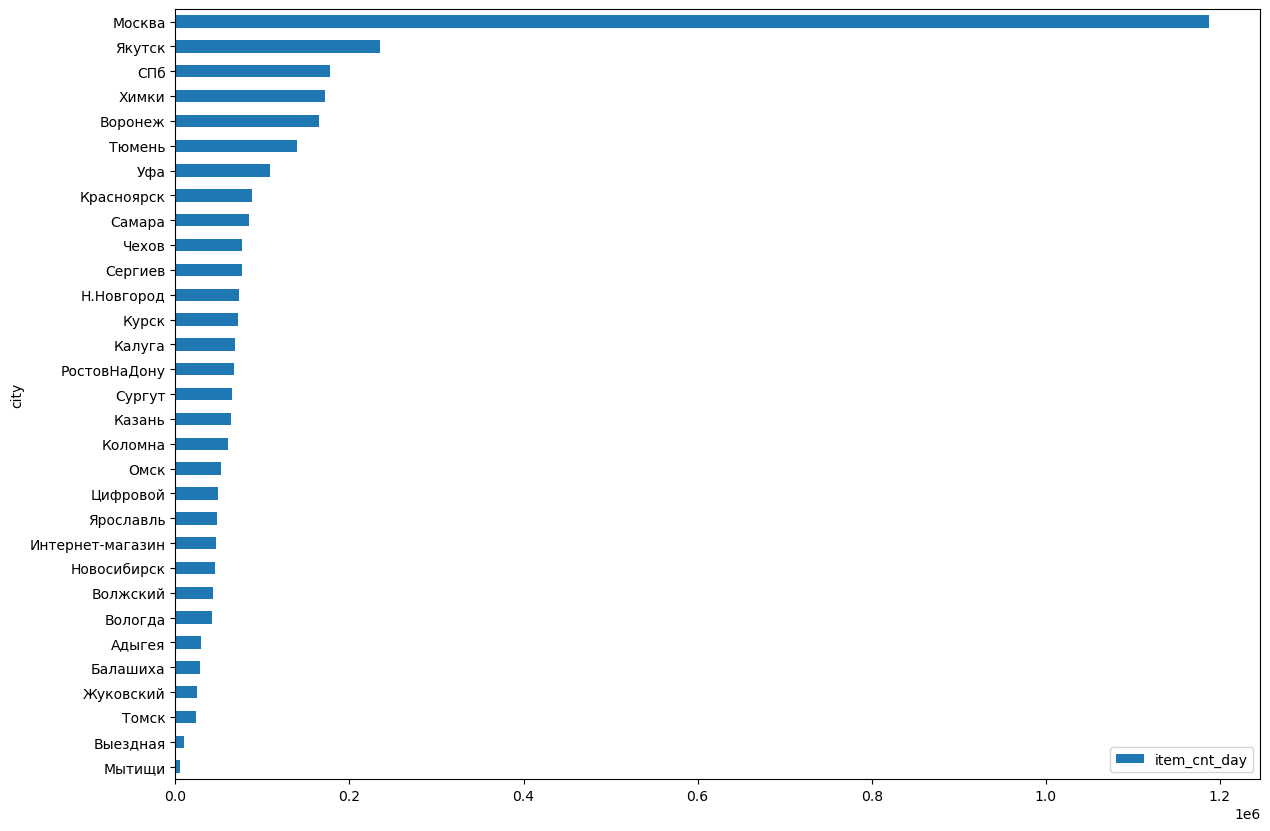

In [19]:
#sales_by_cities = sales.groupby(['city']).agg({'item_cnt_day':'sum'})
sales.groupby(['city']).agg({'item_cnt_day':'sum'}).\
    sort_values(by=['item_cnt_day']).plot(figsize=(14,10), kind = 'barh')

We have "city" feature and based on graph above it should help a lot with a right feature engineering

<Axes: ylabel='general_item_category_name'>

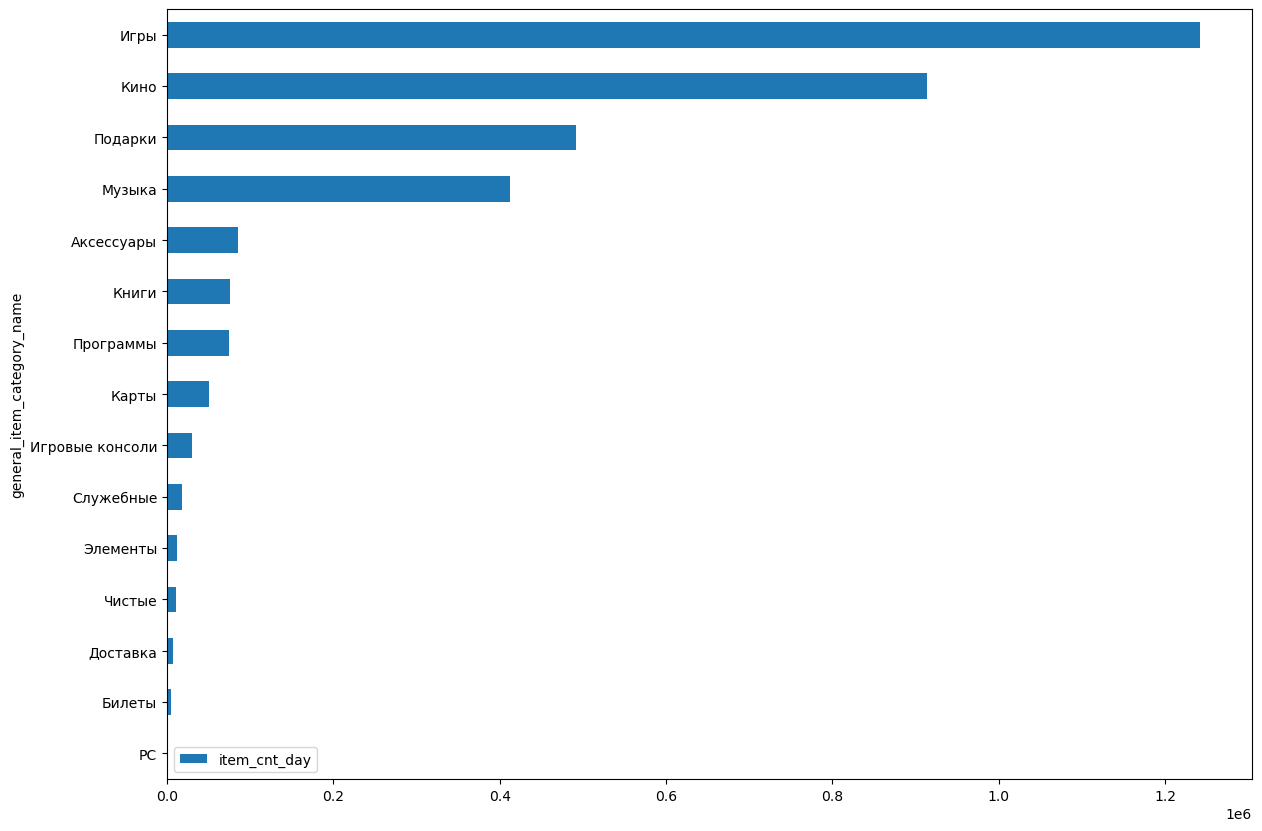

In [20]:
sales.groupby(['general_item_category_name']).agg({'item_cnt_day':'sum'}).\
    sort_values(by = ['item_cnt_day']).plot(figsize = (14,10), kind = 'barh')

Category of the item should help to predict feature sales as well

<Axes: ylabel='shop_name'>

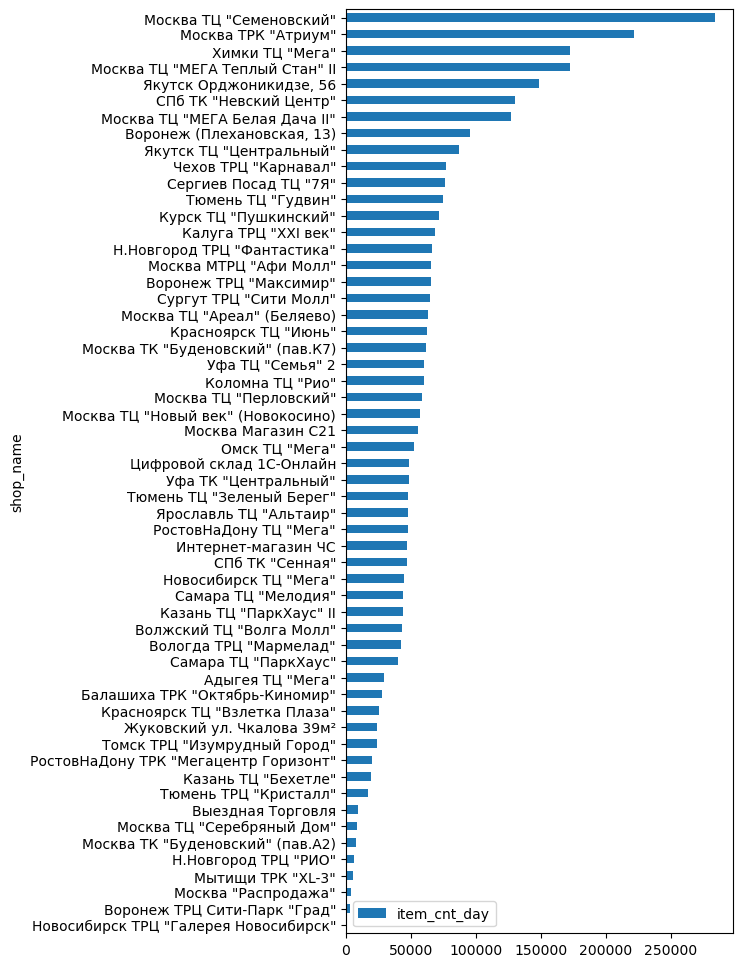

In [21]:
shop_sales = sales.groupby(['shop_name']).agg({'item_cnt_day': 'sum'}).sort_values(by = 'item_cnt_day')
shop_sales.plot(kind = 'barh', figsize = (5,12))

It would be greate to compare best selling shops overall and cities:

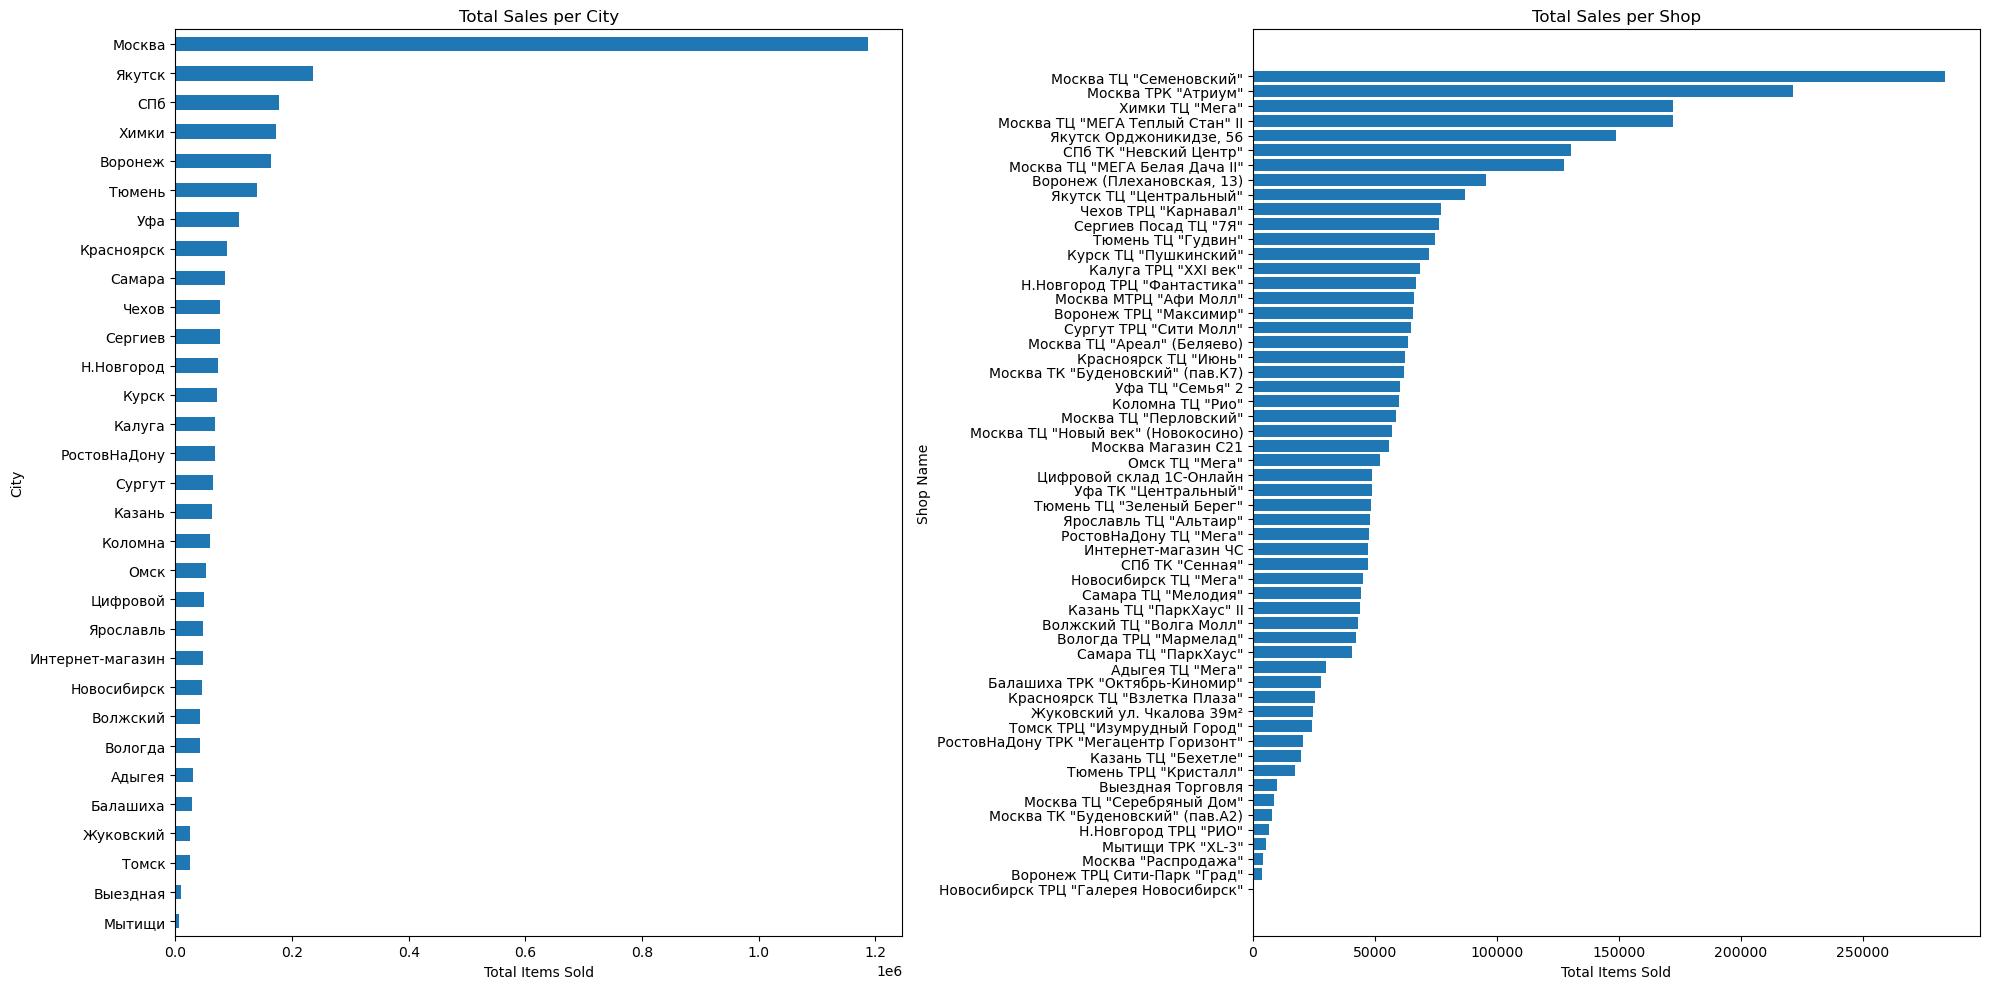

In [22]:
shop_sales = sales.groupby(['shop_name'], as_index=False).agg({'item_cnt_day': 'sum'}).sort_values(by = 'item_cnt_day')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

sales.groupby(['city'])['item_cnt_day'].sum().sort_values()\
     .plot(kind='barh', ax=axes[0], title='Total Sales per City')
axes[0].set_xlabel('Total Items Sold')
axes[0].set_ylabel('City')

axes[1].barh(shop_sales['shop_name'], shop_sales['item_cnt_day'])
axes[1].set_title('Total Sales per Shop')
axes[1].set_xlabel('Total Items Sold')
axes[1].set_ylabel('Shop Name')

plt.tight_layout()

## Prices over cities

<Axes: title={'center': 'Mean price over cities'}, ylabel='city'>

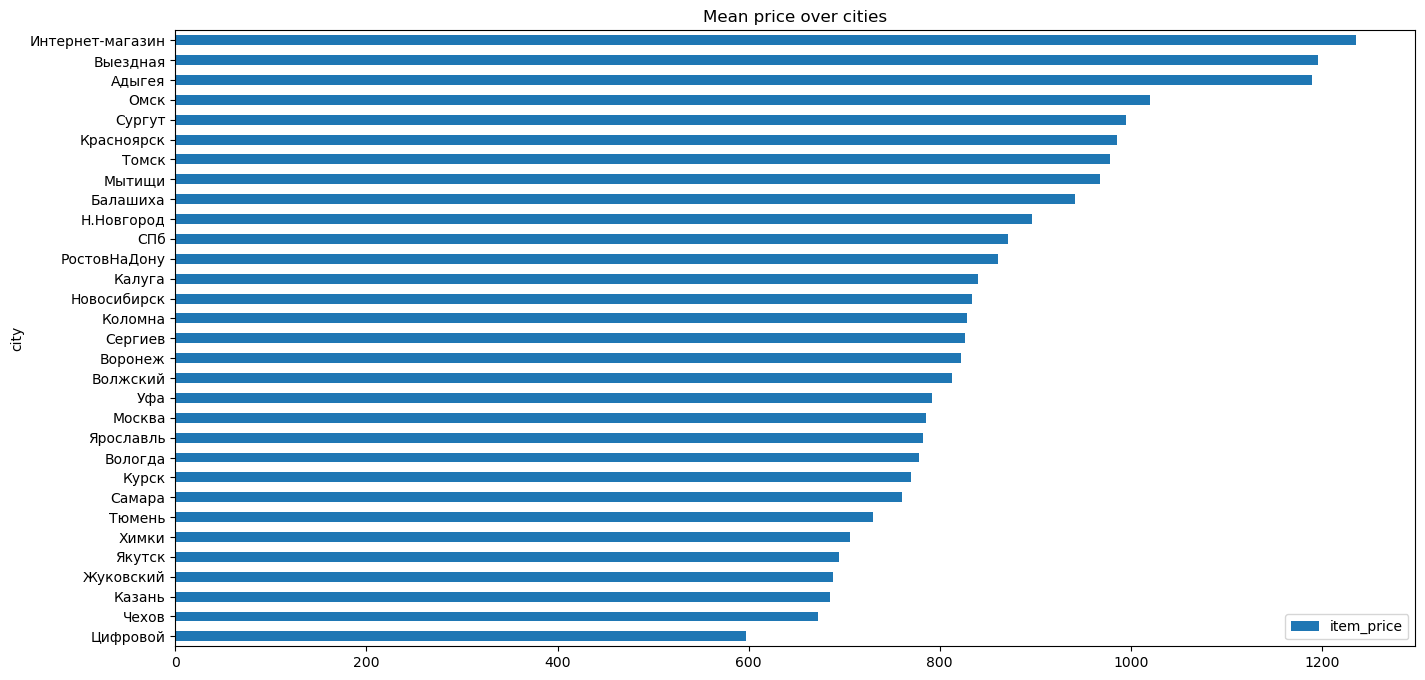

In [23]:
sales.groupby(['city']).agg({'item_price':'mean'}).sort_values(by='item_price')\
    .plot(figsize=(16,8) , kind = 'barh', title = 'Mean price over cities')

As we can see this graph and relation doesn't reflect a lot information about our data. It's more likely expected relation between cities and mean prices. 

## Heatmaps

### Active shops by monthes (agregated by amount of sold items)

This graph reflects how many items have been sold among shops every month

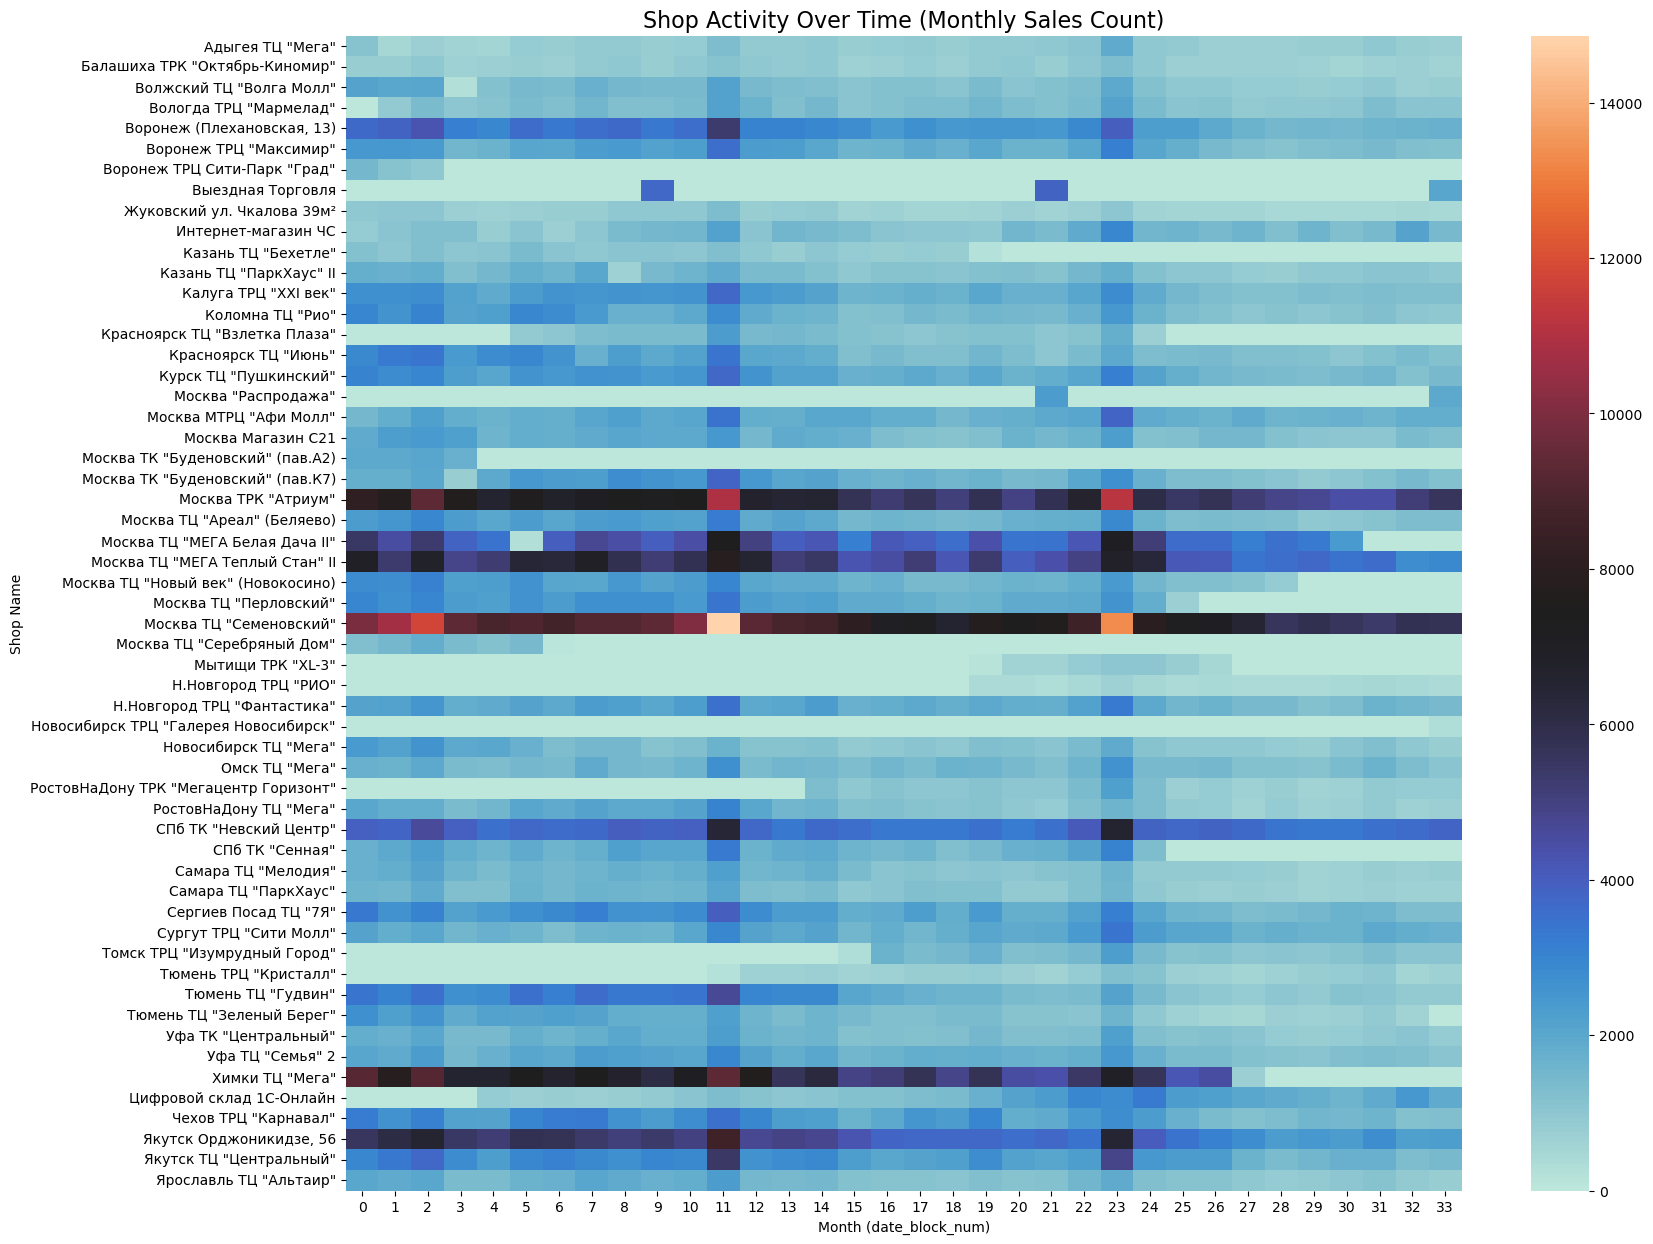

In [24]:
heatmap_shop_month = sales.pivot_table(
    index='shop_name',
    columns='date_block_num',
    values='item_cnt_day',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(18, 15))
sns.heatmap(heatmap_shop_month, cmap='icefire')
plt.title('Shop Activity Over Time (Monthly Sales Count)', fontsize=16)
plt.xlabel('Month (date_block_num)')
plt.ylabel('Shop Name')
plt.show()

In [25]:
unactive_shops_id = [8,9,20,32,33,34,36,48,49]

In [26]:
heatmap_shop_month.head(5)

date_block_num,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
shop_name,,,,,,,,,,,,,,,,,,,,,
"Адыгея ТЦ ""Мега""",1151.0,489.0,741.0,585.0,553.0,816.0,809.0,872.0,908.0,771.0,...,963.0,883.0,741.0,754.0,749.0,800.0,789.0,938.0,806.0,714.0
"Балашиха ТРК ""Октябрь-Киномир""",767.0,801.0,959.0,648.0,713.0,785.0,704.0,873.0,959.0,792.0,...,977.0,734.0,746.0,712.0,718.0,675.0,542.0,667.0,699.0,613.0
"Волжский ТЦ ""Волга Молл""",2111.0,2021.0,2048.0,281.0,1210.0,1446.0,1383.0,1714.0,1455.0,1416.0,...,1173.0,976.0,975.0,832.0,845.0,796.0,844.0,931.0,732.0,804.0
"Вологда ТРЦ ""Мармелад""",0.0,878.0,1357.0,1008.0,1107.0,1379.0,1261.0,1514.0,1257.0,1255.0,...,1354.0,1096.0,1110.0,913.0,985.0,950.0,994.0,1294.0,1070.0,1053.0
"Воронеж (Плехановская, 13)",3667.0,3857.0,4241.0,3135.0,2952.0,3643.0,3327.0,3586.0,3715.0,3334.0,...,2319.0,2265.0,1924.0,1683.0,1494.0,1524.0,1476.0,1570.0,1652.0,1724.0


In [27]:
# df = sales.groupby(by = ['shop_id', 'date_block_num']).agg({'item_cnt_day': 'sum'}).unstack()

What are those shops ?

In [28]:
sales[sales['shop_id'].isin(unactive_shops_id)]['shop_name'].unique()

array(['Воронеж ТРЦ Сити-Парк "Град"', 'Москва ТЦ "Серебряный Дом"',
       'Выездная Торговля', 'Тюмень ТРЦ "Кристалл"',
       'Томск ТРЦ "Изумрудный Город"', 'Н.Новгород ТРЦ "РИО"',
       'Мытищи ТРК "XL-3"', 'Москва "Распродажа"',
       'Новосибирск ТРЦ "Галерея Новосибирск"'], dtype=object)

Here we can see that shops with unactive_shops_id = [8,9,20,32,33,34,36,48,49] are showing that they where not active whole period or was active for small period of time without hight amount of sold items.

### Active categories by monthes

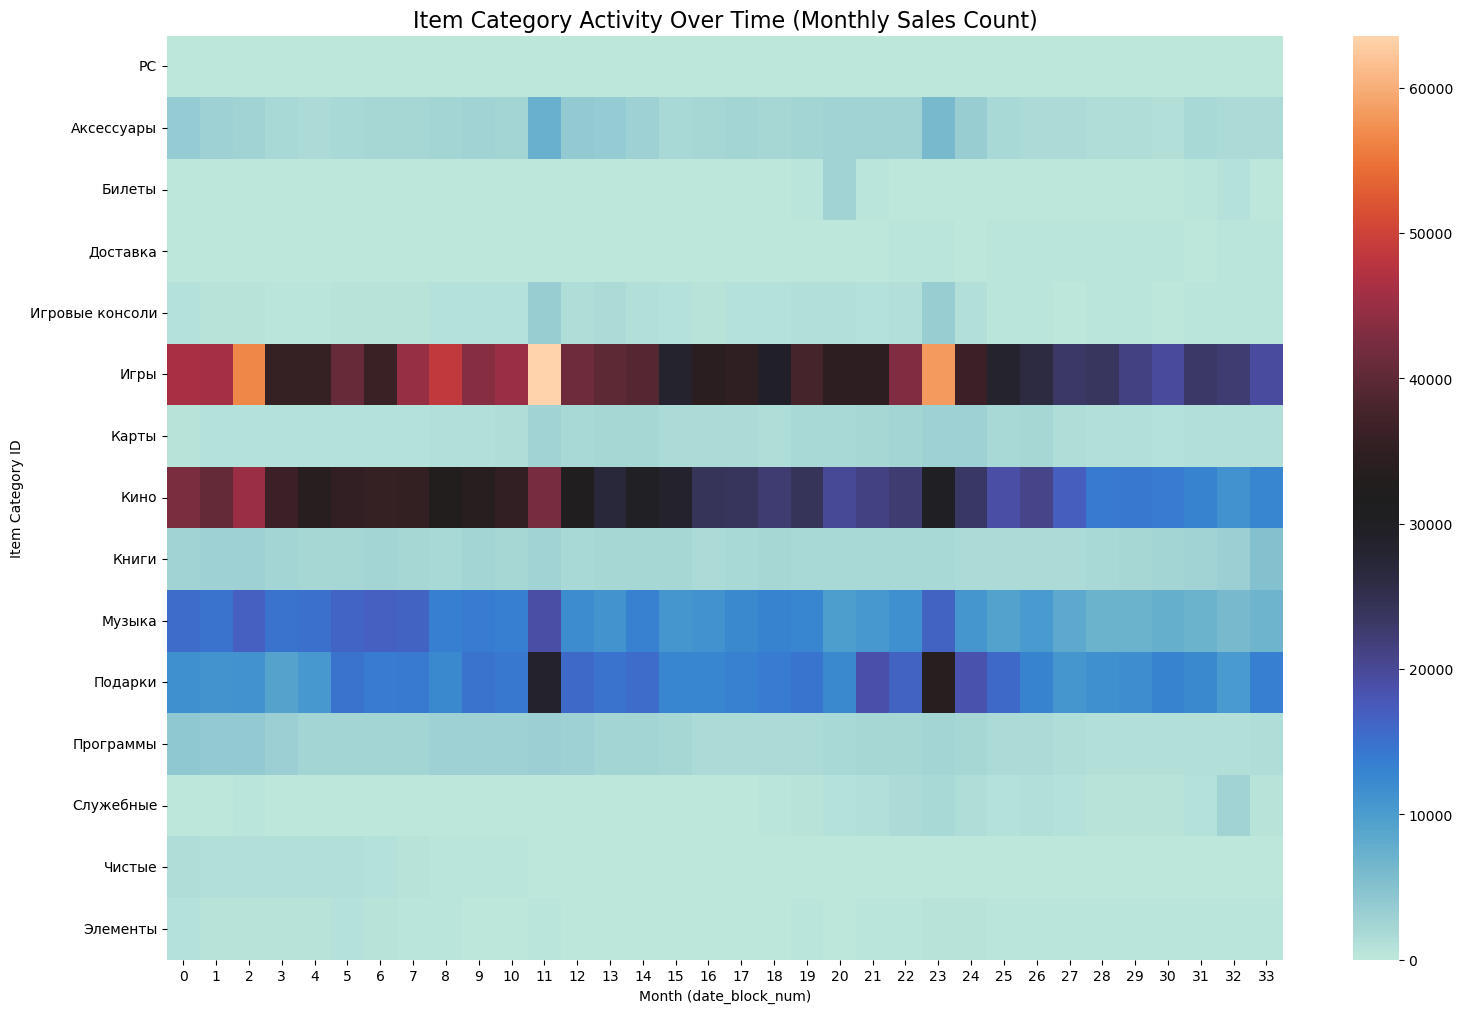

In [29]:
heatmap_cat_month = sales.pivot_table(
    index='general_item_category_name',
    columns='date_block_num',
    values='item_cnt_day',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(18, 12))
sns.heatmap(heatmap_cat_month, cmap='icefire')
plt.title('Item Category Activity Over Time (Monthly Sales Count)', fontsize=16)
plt.xlabel('Month (date_block_num)')
plt.ylabel('Item Category ID')
plt.show()

Granulised view on which categoris are sold better in which monthes:

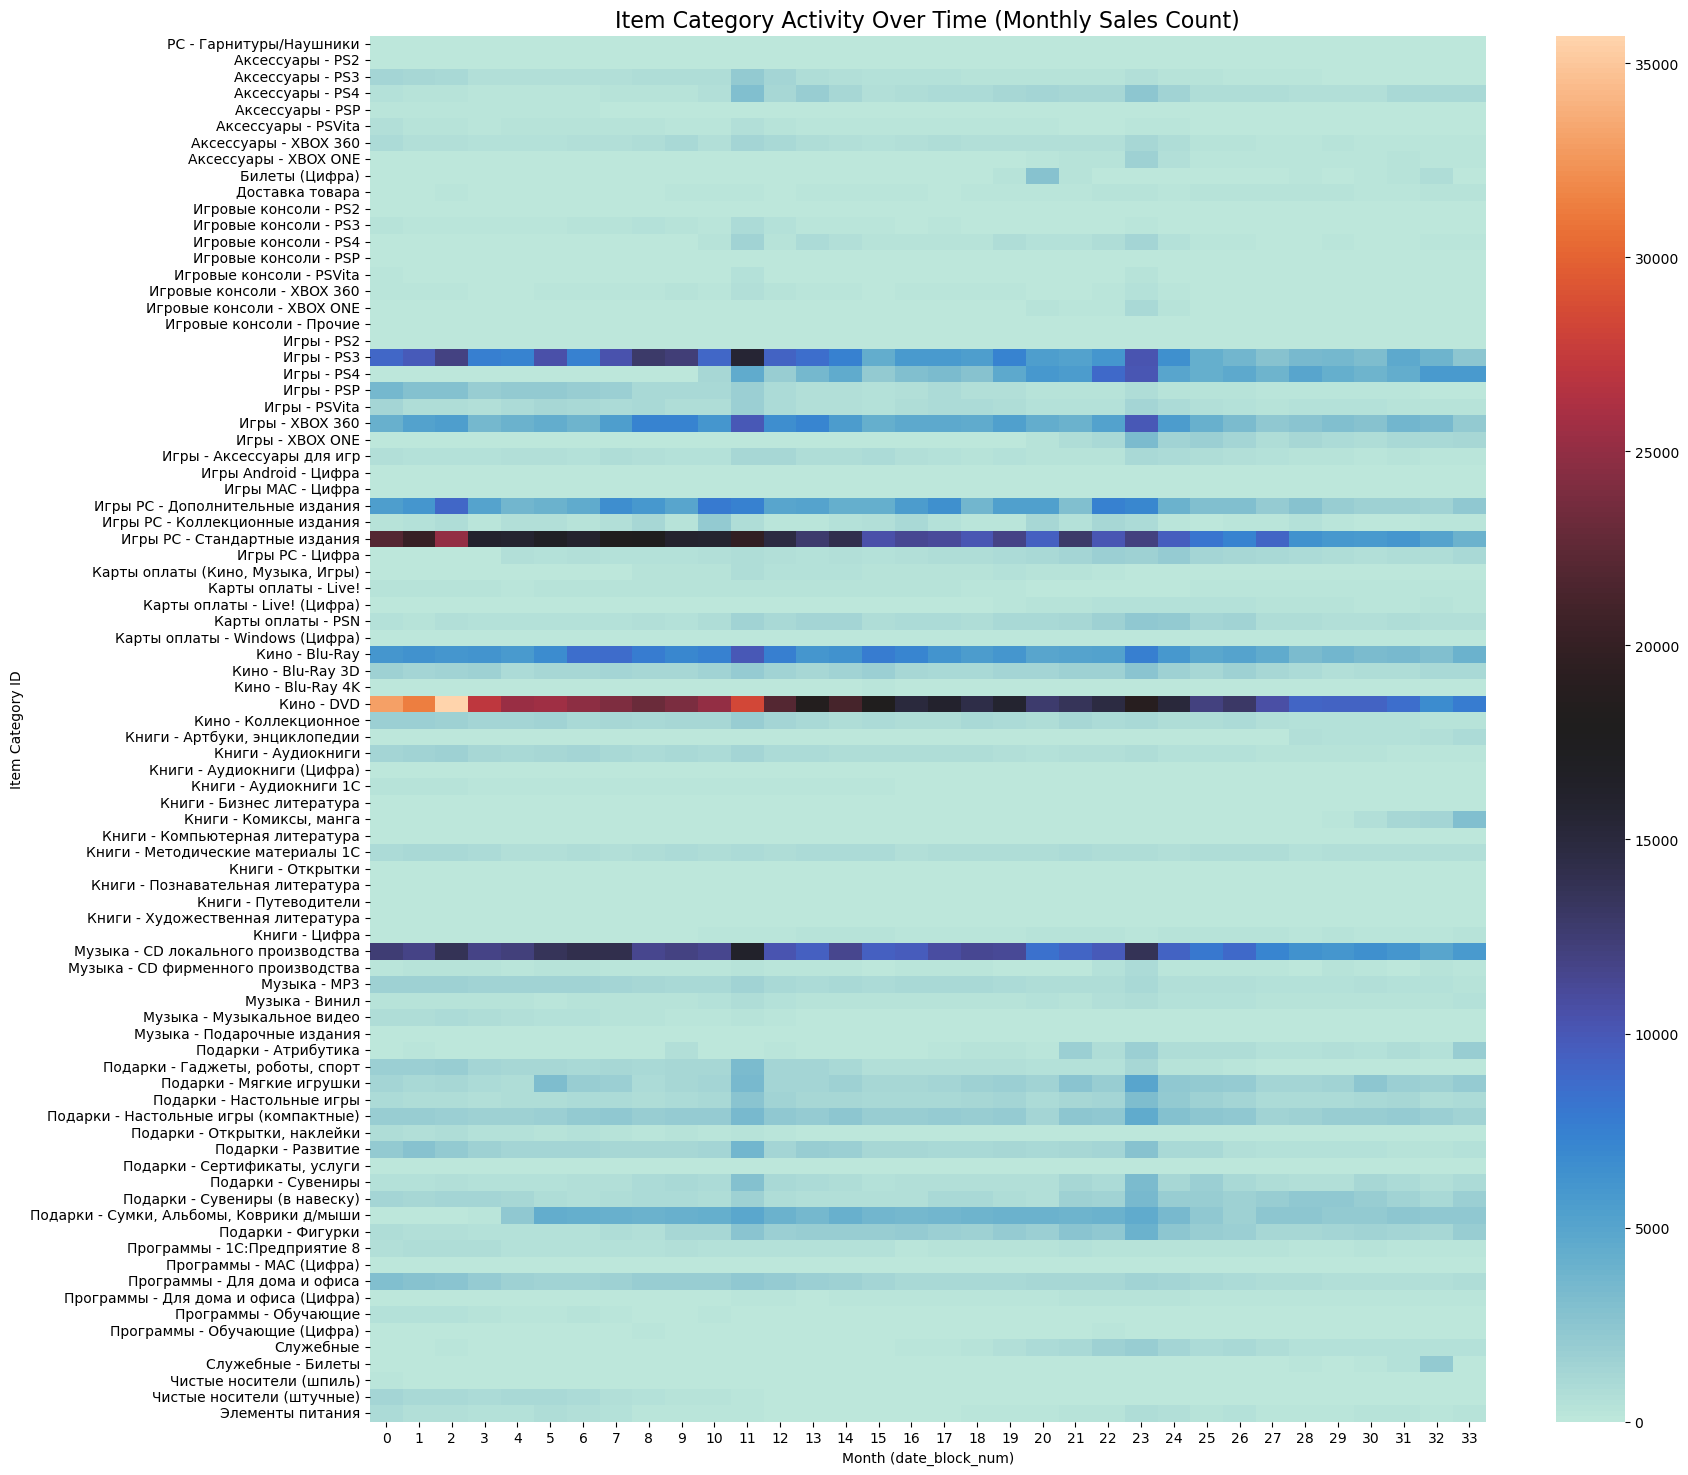

In [30]:
heatmap_cat_month = sales.pivot_table(
    index='item_category_name',
    columns='date_block_num',
    values='item_cnt_day',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(18, 18))
sns.heatmap(heatmap_cat_month, cmap='icefire')
plt.title('Item Category Activity Over Time (Monthly Sales Count)', fontsize=16)
plt.xlabel('Month (date_block_num)')
plt.ylabel('Item Category ID')
plt.show()

As we can see on graph above there only several active categories over monthes what's expected due to only several categories have been sold in big amounts.

Let's also check at least somehow, how active exact items over time

In [31]:
sales['item_id'].nunique()

21804

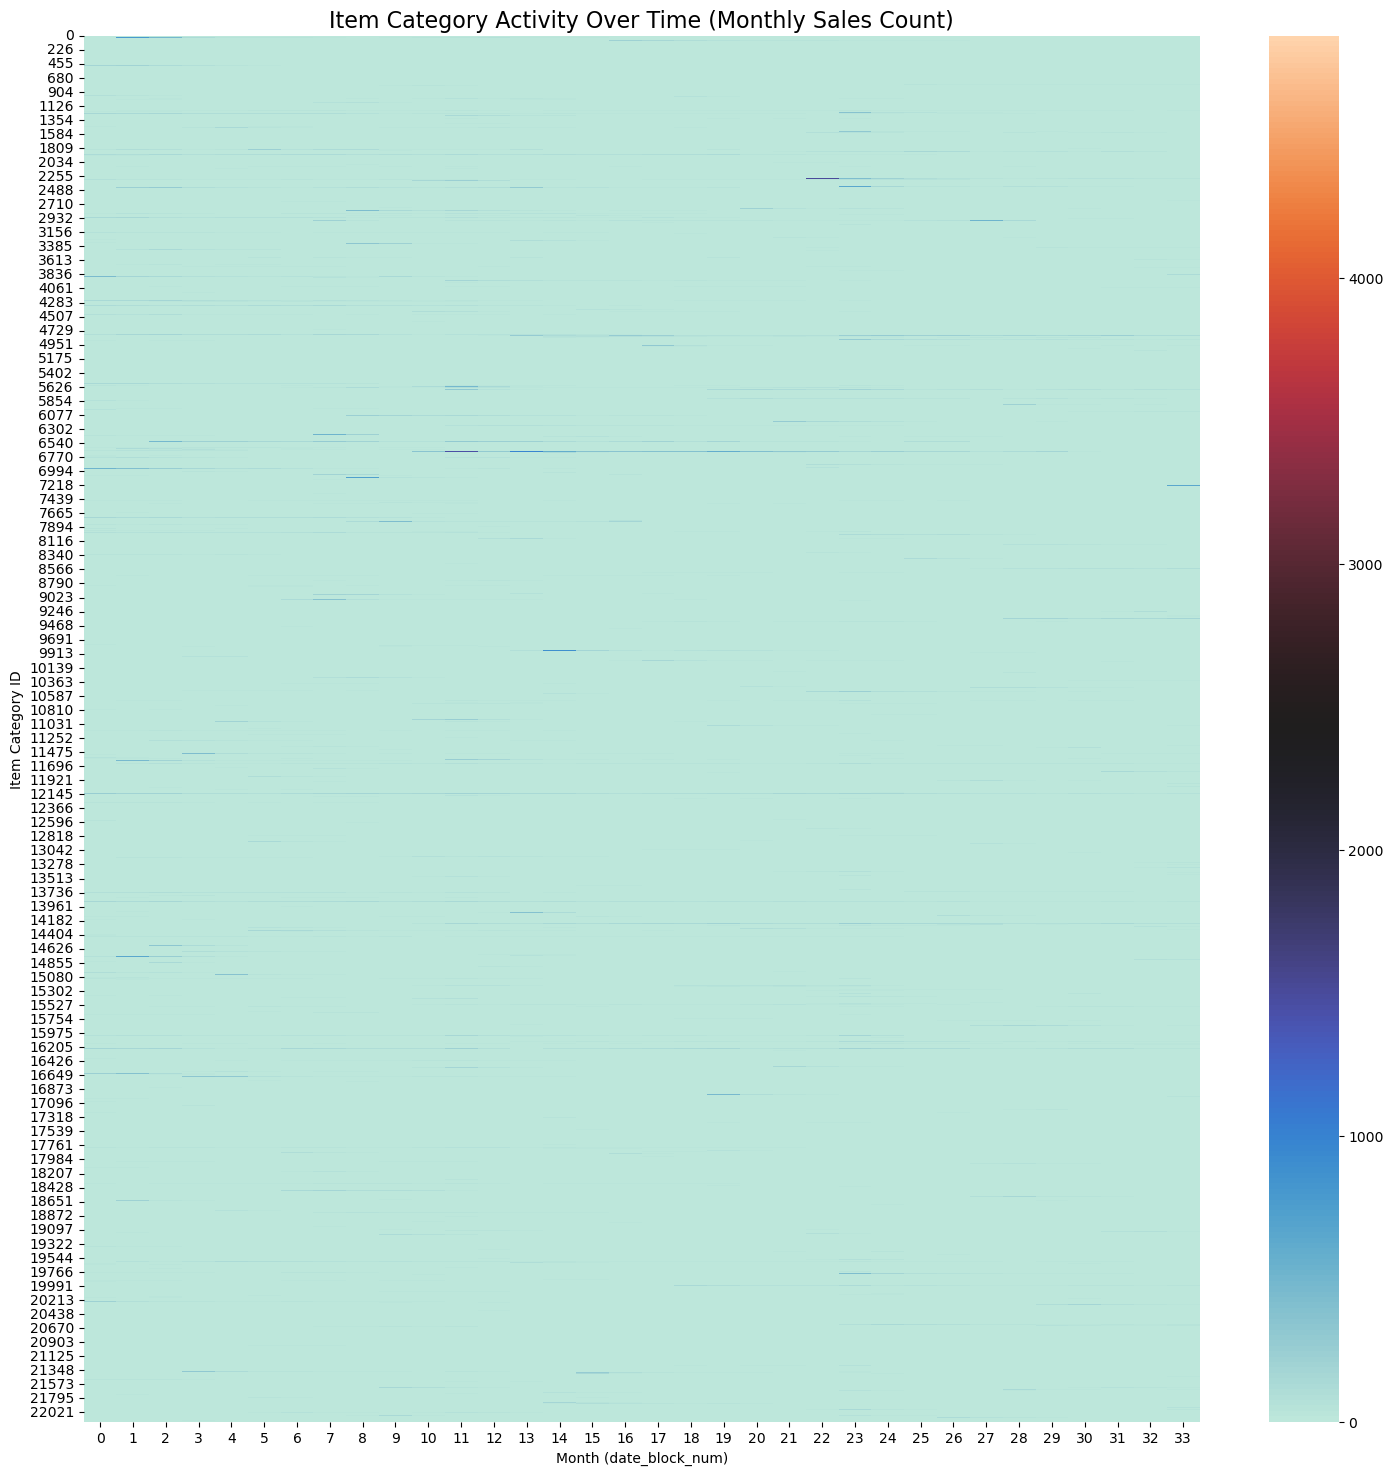

In [32]:
heatmap_cat_month = sales.pivot_table(
    index='item_id',
    columns='date_block_num',
    values='item_cnt_day',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(18, 18))
sns.heatmap(heatmap_cat_month, cmap='icefire')
plt.title('Item Category Activity Over Time (Monthly Sales Count)', fontsize=16)
plt.xlabel('Month (date_block_num)')
plt.ylabel('Item Category ID')
plt.show()

### In which shops which categoris have been sold better?

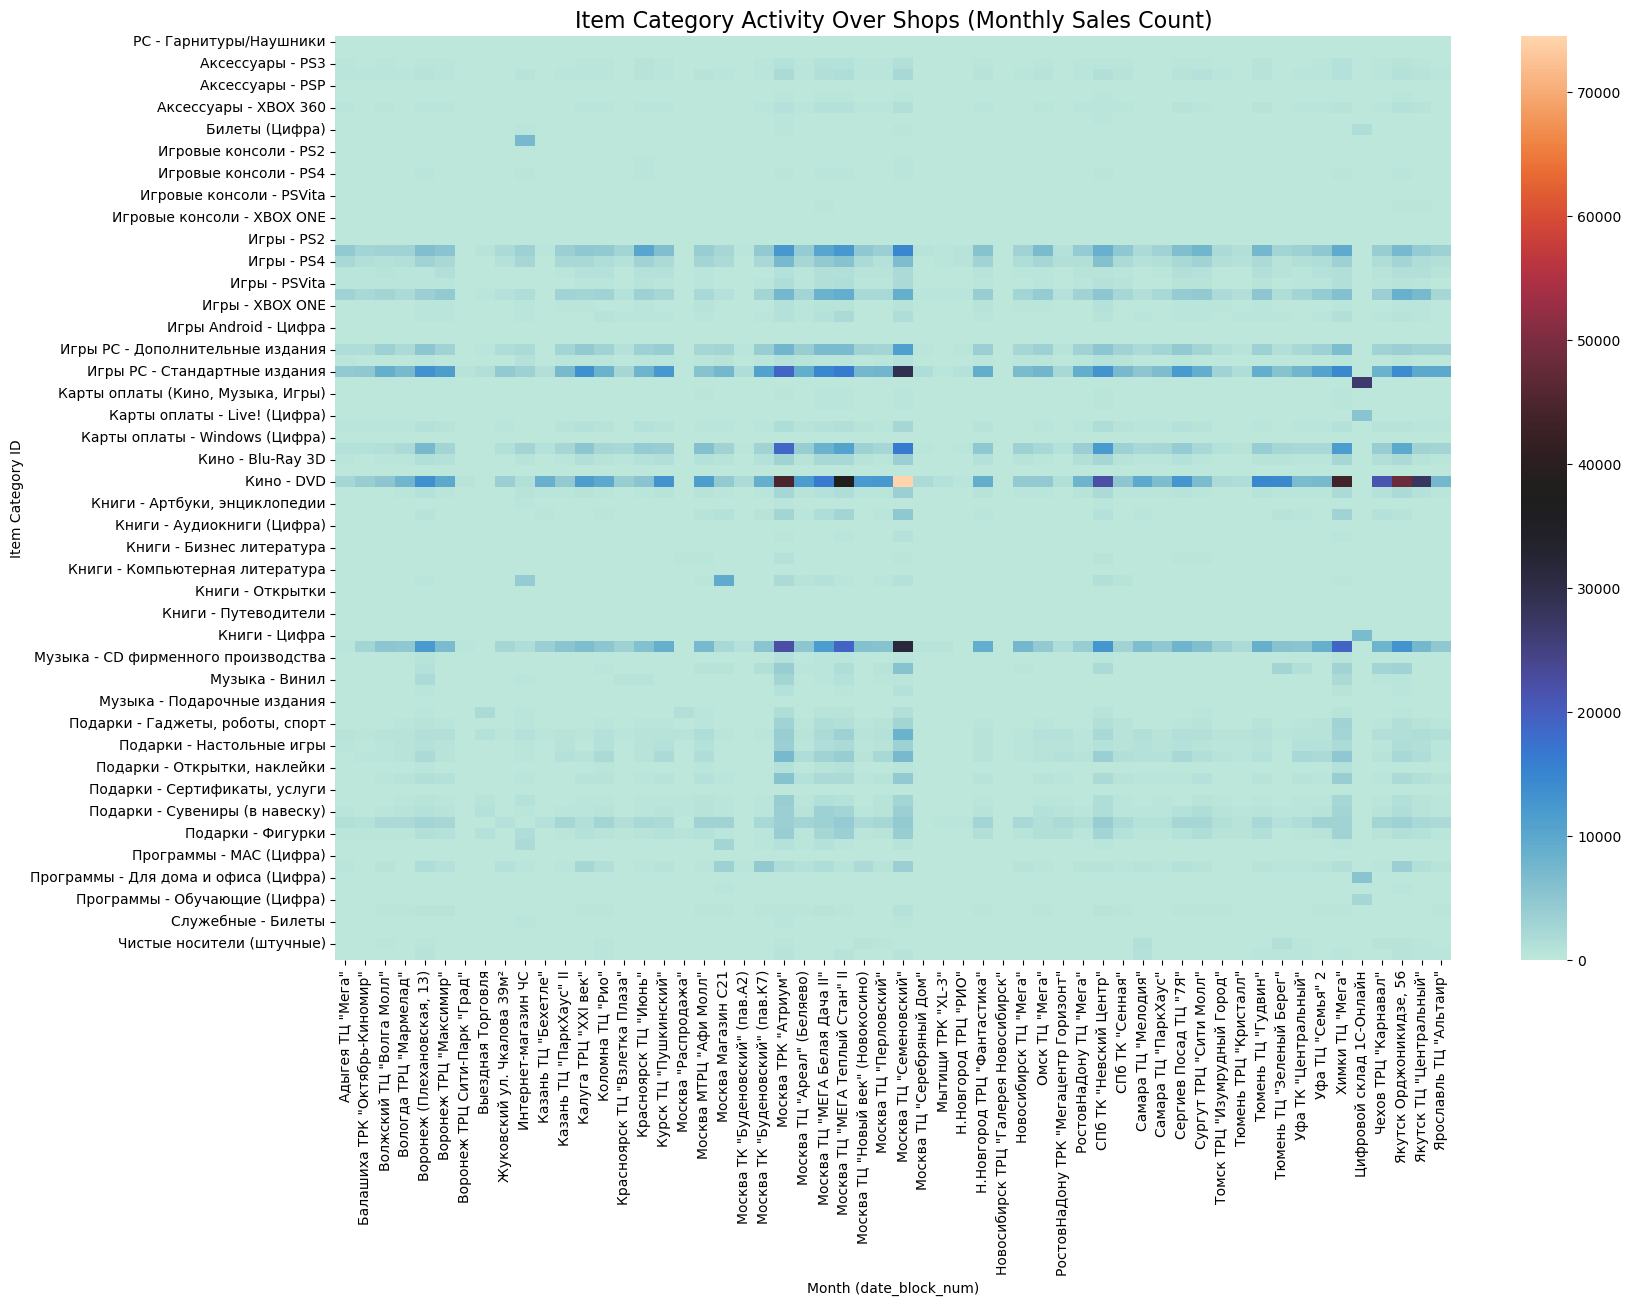

In [33]:
heatmap_cat_month = sales.pivot_table(
    index='item_category_name',
    columns='shop_name',
    values='item_cnt_day',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(18, 12))
sns.heatmap(heatmap_cat_month, cmap='icefire')
plt.title('Item Category Activity Over Shops (Monthly Sales Count)', fontsize=16)
plt.xlabel('Month (date_block_num)')
plt.ylabel('Item Category ID')
plt.show()

This graph doesn't show a lot insides, but it nicely proves that on average, the same categories are sold better in certain shops, and it depends how many items this shops sells on average. Nevertheless we have some kind of "outliers", those are when the same category sold much better in one of shops when both shops are performing good.

## Conclusion before Feature Engineering

Based on EDA research and peculiarities of time series forecast we would like to give our model the more information about past as possible.

**Basic features:**

- City of the shop  
- Category of the product (item)  
- General product category (item)  
- Monthly sales of exact category in shop `item_cnt_month` (it will be our target)

**We also should add some lag features based on statistical metrics for exact shops, item_id's, and categories:**

- Total / Mean amount of sold exact `item_id` in this month (How many of this `item_id` we sold in this month?)  
- Total / Mean amount of `item_cnt_day` sold this month in the exact shop (How many items this shop sold this month?)  
- Total / Mean amount of product category sold in this month (How well this category sold during this month?)  
- Total / Mean amount of general product category sold in this month (How well "Movies" category sold during this month?)

**Combined:**
- Mean of how many items of exact category exact shop sell per month (How good this shop sells products of this cateogry?)


**Next:**
- Then we need to add lags for 1, 2, 3, 12 month periods for all features mentioned above  
- Also, would be nice to add a feature like `not_full_historical_data` for the first three months and for monthes in the first year
- Add "deltas" for target - as how amount of sold items been changed for the last monthes of this `shop_id` and `item_id` 
- Add binary feature `first_month_item_id` which reflects if exact item will be sold first time in this month
- Add mean sliding window for target for the last three monthes `mean_3`
- Number of month as `month = date_block_num mod 12`
- Add binary feature `shop_was_in_test` and `item_id_was_in_test` for shops and items which will be in test when model will predict

**Additional:**
- Mean price of exact `item_id` across all shops and monthes
